# Preliminary Visualization: Sample Data

Note that you may have to download a package called basemap. This can easily be done by running 'conda install basemap'. It also installs the necessary dependencies.

In [99]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mpl_toolkits.basemap import Basemap

from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

In [64]:
df = pd.read_csv('81437-registro-de-posicao-a-data-3613.csv', header=None, names=['Event Date', '??1', '??2', 'lat', 'lon', '??3'])
df.head()

#smalldf = df[df['long'] <= 180]
#smalldf = smalldf[smalldf['lat'] <= 90]

,Event Date,??1,??2,lat,lon,??3
0,2013-06-03 04:00:00.010,2013-06-03 03:59:58.000,32860,-23.757332,-46.705347,40468
1,2013-06-03 04:00:00.030,2013-06-03 03:59:57.000,768,-23.554250,-46.558375,57424
2,2013-06-03 04:00:00.047,2013-06-03 03:59:59.000,1119,-23.685488,-46.680780,41529
3,2013-06-03 04:00:00.060,2013-06-03 03:59:46.000,879,-23.451138,-46.739765,55231
4,2013-06-03 04:00:00.060,2013-06-03 03:59:58.000,1992,-23.731887,-46.786530,36873


Set up the basemap projection. Note that in the actual dataframe there is some bad lat/lon data, but I didn't have time to parse through and clean, since I wanted to get SOMETHING done by this morning. Unfortunately I don't have anymore time between now and our meeting.

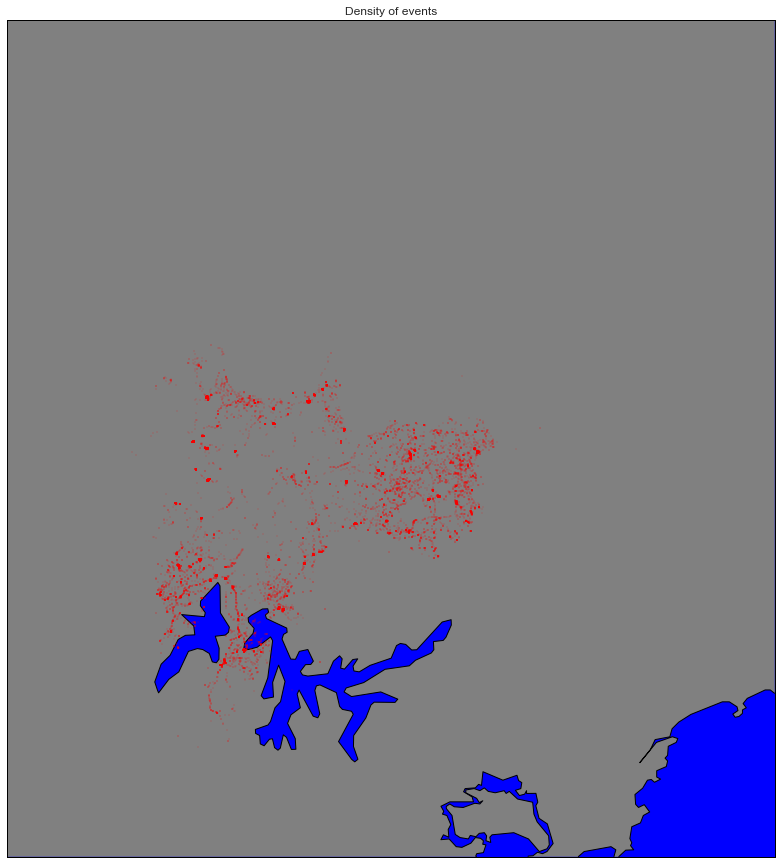

In [105]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-24,urcrnrlat=-23,\
            llcrnrlon=-47,urcrnrlon=-46,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='grey',lake_color='blue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='blue')
plt.title("Density of events")

for x in range(25000):
    m.plot(df.lon[x],df.lat[x],'ro',latlon=True,ms=1,alpha=.5)

plt.show()